## Word 2 Vec

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

filename="C:/Users/Madhu/Desktop/"
data = pd.read_csv(filename+'sentences.csv')

In [2]:
data.head()

,SentenceId,EpisodeId,Season,Episode,Sentence
0,1,1,1,1,Pilot
1,2,1,1,1,Scene One
2,3,1,1,1,[Title: The Year 2030]
3,4,1,1,1,"Narrator: Kids, I'm going to tell you an incre..."
4,5,1,1,1,Son: Are we being punished for something?


In [3]:
df= data.loc[data['Season']==1]
df=df.fillna("(")

In [4]:
df['Character']=""
for sen,id in zip(df["Sentence"],df["SentenceId"]):
    
    if "[" is sen[0] or "(" is sen[0] or "Scene" in sen[0:5] or ":" not in sen:
        df = df.drop(df[df['Sentence']==sen].index)
        
    else:
        value=""
        for c in sen:
            if c==":":
                df.set_value(id-1, 'Sentence', sen[len(value)+1:])
                break
                
            else:
                value+=c
                
        
        if "(" in value:
            index=value.index("(")
            value=value[:index-1]
            
        value=value.lower()    
        #df.loc[df['Sentence'] == sen,'Character']=sen #setting the values
        df.set_value(id-1, 'Character', value)

#re arrange the order 
df = df[['SentenceId','EpisodeId','Season','Episode','Character','Sentence']]

In [5]:
df[:5]

,SentenceId,EpisodeId,Season,Episode,Character,Sentence
3,4,1,1,1,narrator,"Kids, I'm going to tell you an incredible sto..."
4,5,1,1,1,son,Are we being punished for something?
5,6,1,1,1,narrator,No
6,7,1,1,1,daughter,"Yeah, is this going to take a while?"
7,8,1,1,1,narrator,Yes. (Kids are annoyed) Twenty-five years ago...


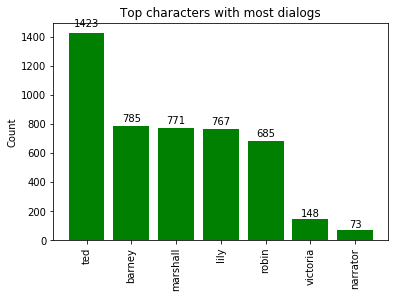

In [6]:
# for labeling in plotting
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')

topchar=df.Character.value_counts()[:7]
labels=np.array(topchar.keys())
values=np.array(topchar)
ind=np.arange(len(labels))

fig,ax=plt.subplots()
rects=ax.bar(ind,values,color='g')
ax.set_xticklabels(labels,rotation='vertical')
ax.set_xticks(ind)
ax.set_ylabel("Count")
ax.set_title("Top characters with most dialogs")
autolabel(rects)
plt.show()

In [7]:
#pre processing the text 
import re
def normalize_text(text):

    text=text.lower()
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(pic\.twitter\.com/[^\s]+))','', text)
    text = re.sub('@[^\s]+','', text)
    text = re.sub('#([^\s]+)', '', text)
    text = re.sub('[:;>?<=*+()&,\-#!$%\{˜|\}\[^_\\@\]1234567890’‘]',' ', text)
    text = re.sub('[\d]','', text)
    text = text.replace(".", '')
    text = text.replace("'", '')
    text = text.replace("`", '')
    text = text.replace("'s", '')
    text = text.replace("/", ' ')
    text = text.replace("\"", ' ')
    text = text.replace("\\", '')
    re.sub(' +', ' ', text)
    text=text.replace('\n', ' ').replace('\r', ' ').replace('\t', ' ')
    #normalize some utf8 encoding
    text = text.replace("\x9d",'').replace("\x8c",'')
    text = text.replace("\xa0",'')
    text = text.replace("\x9d\x92", '').replace("\x9a\xaa\xf0\x9f\x94\xb5", '').replace("\xf0\x9f\x91\x8d\x87\xba\xf0\x9f\x87\xb8", '').replace("\x9f",'').replace("\x91\x8d",'')
    text = text.replace("\xf0\x9f\x87\xba\xf0\x9f\x87\xb8",'').replace("\xf0",'').replace('\xf0x9f','').replace("\x9f\x91\x8d",'').replace("\x87\xba\x87\xb8",'')
    text = text.replace("\xe2\x80\x94",'').replace("\x9d\xa4",'').replace("\x96\x91",'').replace("\xe1\x91\xac\xc9\x8c\xce\x90\xc8\xbb\xef\xbb\x89\xd4\xbc\xef\xbb\x89\xc5\xa0\xc5\xa0\xc2\xb8",'')
    text = text.replace("\xe2\x80\x99s", "").replace("\xe2\x80\x98", '').replace("\xe2\x80\x99", '').replace("\xe2\x80\x9c", "").replace("\xe2\x80\x9d", "")
    text = text.replace("\xe2\x82\xac", "").replace("\xc2\xa3", "").replace("\xc2\xa0", "").replace("\xc2\xab", "").replace("\xf0\x9f\x94\xb4", "").replace("\xf0\x9f\x87\xba\xf0\x9f\x87\xb8\xf0\x9f", "")
    text =  re.sub(r"\b[a-z]\b", "", text)
    text=re.sub( '\s+', ' ', text).strip()
    
    text=re.sub(r'\.+', ".", text)
    text=re.sub(r'\.\.+', ' ', text).replace('.', '')
    # Replace multiple dots with space
    text = re.sub('\.\.+', ' ', text) 
    # Remove single dots
    text = re.sub('\.', '', text)
    text = re.sub(r'\.{2,}', ' ', text)
    text = re.sub(r'\.{1}', '', text)
    
    return text

In [8]:
sentences=df["Sentence"].tolist()
normalized_sentences=[]
for sentence in sentences:
    norm_sent=normalize_text(sentence)
    normalized_sentences.append(norm_sent)

In [9]:
import collections
# sentences to words and count
words=" ".join(normalized_sentences).split() 
count= collections.Counter(words).most_common() 
print ("Word count", count[:5])

Word count [('you', 2061), ('the', 1585), ('to', 1537), ('and', 1027), ('it', 839)]


In [10]:
# Build dictionaries
unique_words =  [i[0] for i in count]
dic = {w: i for i, w in enumerate(unique_words)} #dic, word -> id cats:0 dogs:1 ......
voc_size = len(dic)

In [11]:
voc_size

5057

In [12]:
# Make indexed word data
data = [dic[word] for word in words] #count rank for every word in words
print('Sample data', data[:10], words[:10])

Sample data [198, 8, 42, 2, 125, 0, 77, 839, 185, 1] ['kids', 'im', 'going', 'to', 'tell', 'you', 'an', 'incredible', 'story', 'the']


In [13]:
# Let's make a training data for window size 1 for simplicity

cbow_pairs = [];
for i in range(1, len(data)-1) :
    cbow_pairs.append([[data[i-1], data[i+1]], data[i]]);
print('Context pairs rank ids', cbow_pairs[:5])
print()
cbow_pairs_words = [];
for i in range(1, len(words)-1) :
    cbow_pairs_words.append([[words[i-1], words[i+1]], words[i]]);
print('Context pairs words', cbow_pairs_words[:5])

Context pairs rank ids [[[198, 42], 8], [[8, 2], 42], [[42, 125], 2], [[2, 0], 125], [[125, 77], 0]]

Context pairs words [[['kids', 'going'], 'im'], [['im', 'to'], 'going'], [['going', 'tell'], 'to'], [['to', 'you'], 'tell'], [['tell', 'an'], 'you']]


In [14]:
# Let's make skip-gram pairs
# (quick, the), (quick, brown), (brown, quick), (brown, fox), ...
skip_gram_pairs=[]

for c in cbow_pairs:
    skip_gram_pairs.append([c[1],c[0][0]])
    skip_gram_pairs.append([c[1],c[0][1]])
print('skip-gram pairs', skip_gram_pairs[:5])
print()
skip_gram_pairs_words=[]
for c in cbow_pairs_words:
    skip_gram_pairs_words.append([c[1],c[0][0]])
    skip_gram_pairs_words.append([c[1],c[0][1]])
print('skip-gram pairs words', skip_gram_pairs_words[:5])

skip-gram pairs [[8, 198], [8, 42], [42, 8], [42, 2], [2, 42]]

skip-gram pairs words [['im', 'kids'], ['im', 'going'], ['going', 'im'], ['going', 'to'], ['to', 'going']]


In [15]:
def get_batch(size):
    assert size<len(skip_gram_pairs)
    X=[]
    Y=[]
    rdm = np.random.choice(range(len(skip_gram_pairs)),size,replace=False)
    
    for r in rdm:
        X.append(skip_gram_pairs[r][0])
        Y.append([skip_gram_pairs[r][1]])
    return X , Y

# generate_batch test
print ('Batches (x, y)', get_batch(3))

Batches (x, y) ([124, 108, 3], [[3], [9], [433]])


In [16]:
#tensor flow code
import tensorflow as tf

batch_size = 20
embedding_size = 2
num_sampled = 15    # Number of negative examples to sample.

X= tf.placeholder(tf.int32,shape=[batch_size]) #inputs
Y= tf.placeholder(tf.int32,shape=[batch_size,1]) #labels

with tf.device("/cpu:0"):
      # Look up embeddings for inputs.
    embeddings = tf.Variable(tf.random_uniform([voc_size,embedding_size],-1.0,1.0))
    embed = tf.nn.embedding_lookup(embeddings, X) # lookup table
    
# Construct the variables for the NCE loss
nce_weights = tf.Variable(tf.random_uniform([voc_size, embedding_size],-1.0, 1.0))
nce_biases = tf.Variable(tf.zeros([voc_size]))

# Compute the average NCE loss for the batch.
# This does the magic:
#   tf.nn.nce_loss(weights, biases, inputs, labels, num_sampled, num_classes ...)
# It automatically draws negative samples when we evaluate the loss.
loss = tf.reduce_mean(tf.nn.nce_loss(nce_weights, nce_biases, Y, embed, num_sampled, voc_size))
# Use the adam optimizer
optimizer = tf.train.AdamOptimizer(1e-1).minimize(loss)

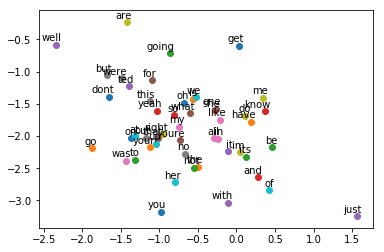

In [17]:
epochs=100
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(epochs):
        
        batch_inputs, batch_labels = get_batch(batch_size)
        _,loss_val=sess.run([optimizer,loss],feed_dict = {X : batch_inputs, Y : batch_labels })
        
        #if epoch % 10 == 0:
          #print("Loss at ", epoch, loss_val) # Report the loss
    
    # Final embeddings are ready for you to use. Need to normalize for practical use
    trained_embeddings = embeddings.eval()
    

import matplotlib.pyplot as plt
# Show word2vec if dim is 2
if trained_embeddings.shape[1] == 2:
    labels = unique_words[:50] # Show top 10 words
    for i, label in enumerate(labels):
        x, y = trained_embeddings[i,:]
        plt.scatter(x, y)
        plt.annotate(label, xy=(x, y), xytext=(5, 2),
            textcoords='offset points', ha='right', va='bottom')
    #plt.savefig("word2vec.png")
    plt.show()

In [18]:
len(trained_embeddings)

5057

In [19]:
trained_embeddings.shape

(5057, 2)